## Анализ причин выжимаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

## Шаблон исследования

In [345]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr


In [209]:
data = pd.read_csv('../data/titanic/train.csv') 

In [210]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Гипотеза 1

__Формулировка__: на выживаемость на Титанике очень сильно влияет пол и класс каюты

In [219]:
# Код для проверки гипотезы
data.groupby(['Pclass', 'Sex'])['Survived'].aggregate(['count',np.sum, np.mean])
###


count  sum      mean
Pclass Sex                         
1      female     94   91  0.968085
       male      122   45  0.368852
2      female     76   70  0.921053
       male      108   17  0.157407
3      female    144   72  0.500000
       male      347   47  0.135447

__Вывод__: гипотеза подтвердилась. Интересно, что для второй класс для женщин почти так же хорошо, как и первый класс. А для мужчин выживаемость почти такая же низкая, как и для третьего класса

###  Гипотеза 2

__Формулировка__: возрост сильно влияет на выживаемость, поскольку в первую очередь спасют женщин и детей

In [212]:
# Код для проверки гипотезы
Age = data.Age.sort_values()
Age.dropna(inplace = True)
b = np.linspace(0, len(Age)-1, num=8)
tupl = []
for i in range(7):
    tupl += [(np.floor(Age.iloc[int(b[i])]),np.floor(Age.iloc[int(b[i+1])]))]
tupl
tupl +=  [(80,120)]    
data["Age"].fillna(100,inplace = True)
bins = pd.IntervalIndex.from_tuples(tupl)
data.insert(6, "AgeC", pd.cut(data.Age, bins ) , True)
###

In [213]:
data.pivot_table(index = ['Pclass','Sex'], columns = 'AgeC', values = 'Survived', aggfunc = 'count')

AgeC           (0.0, 17.0]  (17.0, 21.0]  (21.0, 26.0]  (26.0, 30.0]  \
Pclass Sex                                                             
1      female            8             8            13             6   
       male              4             4             7            11   
2      female           12             5            13            14   
       male             11            11            15            15   
3      female           35            16            17            11   
       male             43            47            50            33   

AgeC           (30.0, 36.0]  (36.0, 45.0]  (45.0, 80.0]  (80.0, 120.0]  
Pclass Sex                                                              
1      female            15            15            20              9  
       male              15            18            42             21  
2      female            13            10             7              2  
       male              21            10            16              9  
3      female             9            11             3             42  
       male              37            28            15             94

In [214]:
data.pivot_table(index = ['Pclass','Sex'], columns = 'AgeC', values = 'Survived', aggfunc = np.sum)

AgeC           (0.0, 17.0]  (17.0, 21.0]  (21.0, 26.0]  (26.0, 30.0]  \
Pclass Sex                                                             
1      female            7             8            12             6   
       male              4             0             4             5   
2      female           12             5            11            13   
       male              9             1             0             0   
3      female           19             6            10             5   
       male             10             6             6             7   

AgeC           (30.0, 36.0]  (36.0, 45.0]  (45.0, 80.0]  (80.0, 120.0]  
Pclass Sex                                                              
1      female            15            15            19              9  
       male              10             6            11              5  
2      female            13             8             6              2  
       male               3             1             1              2  
3      female             5             1             1             25  
       male               6             3             0              9

In [266]:
PT = data.pivot_table(index = ['Pclass','Sex'], columns = 'AgeC', values = 'Survived', aggfunc = np.mean)
PT

AgeC           (0.0, 17.0]  (17.0, 21.0]  (21.0, 26.0]  (26.0, 30.0]  \
Pclass Sex                                                             
1      female     0.875000      1.000000      0.923077      1.000000   
       male       1.000000      0.000000      0.571429      0.454545   
2      female     1.000000      1.000000      0.846154      0.928571   
       male       0.818182      0.090909      0.000000      0.000000   
3      female     0.542857      0.375000      0.588235      0.454545   
       male       0.232558      0.127660      0.120000      0.212121   

AgeC           (30.0, 36.0]  (36.0, 45.0]  (45.0, 80.0]  (80.0, 120.0]  
Pclass Sex                                                              
1      female      1.000000      1.000000      0.950000       1.000000  
       male        0.666667      0.333333      0.261905       0.238095  
2      female      1.000000      0.800000      0.857143       1.000000  
       male        0.142857      0.100000      0.062500       0.222222  
3      female      0.555556      0.090909      0.333333       0.595238  
       male        0.162162      0.107143      0.000000       0.095745

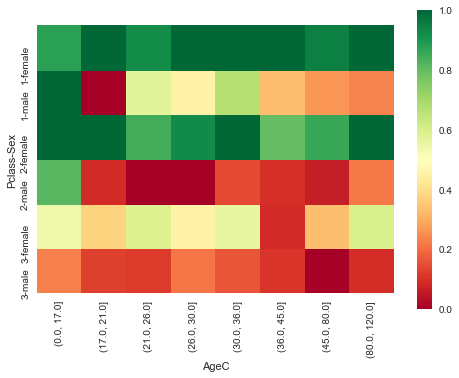

In [216]:
heatmap_plot = sns.heatmap(PT, cmap ="RdYlGn", square=True)
plt.show()

__Вывод__: выживаемось у мальчиков заметно выше, чем у мужчин. Особенно для 1 и 2 классов. Про девочек такое сказать нельзя. Ещё интересный факт, что среди взрослых людей выживаемость выше у людей среднего возраста (30-36 лет) 

### Гипотеза 3
 
__Формулировка__: количество родственников существенно влияет на выживаемость

In [346]:
data['Family'] = data.SibSp + data.Parch

In [347]:
def summary(x):
    return pearsonr(x.Survived , x.Family)[0]

In [349]:
pearsonr(data.Survived , data.Family)[0]
# В целом по теплоходу корреляция не очень большая

0.016638989282745237

In [351]:
data.groupby(['Pclass']).apply(summary)
# В группировке по классам видим существенную корреялцию для второго и первого класса. Для третьего отрицательная

Pclass
1    0.137422
2    0.320134
3   -0.043764
dtype: float64

In [340]:
data.groupby(['Pclass', 'Sex']).apply(summary)
# Если добавить и группировку по по полу, то результат сильно измениться

Pclass  Sex   
1       female   -0.163848
        male      0.079661
2       female    0.105291
        male      0.298796
3       female   -0.312183
        male     -0.019247
dtype: float64

In [356]:
data.pivot_table(index = ['Pclass','Sex'], columns = 'Family', values = 'Survived', aggfunc = np.mean)
# Посмотрим на выживаемость в зависимости от количества родственников 

Family               0         1         2         3    4    5      6    7   \
Pclass Sex                                                                    
1      female  0.970588  1.000000  1.000000  0.500000  1.0  1.0    NaN  NaN   
       male    0.333333  0.387097  0.454545  1.000000  NaN  0.0    NaN  NaN   
2      female  0.906250  0.894737  0.928571  1.000000  1.0  1.0    NaN  NaN   
       male    0.097222  0.066667  0.470588  0.250000  NaN  NaN    NaN  NaN   
3      female  0.616667  0.517241  0.545455  0.833333  0.0  0.0  0.375  0.0   
       male    0.121212  0.178571  0.320000  0.333333  0.0  0.0  0.250  0.0   

Family          10  
Pclass Sex          
1      female  NaN  
       male    NaN  
2      female  NaN  
       male    NaN  
3      female  0.0  
       male    0.0

In [358]:
data.pivot_table(index = ['Pclass','Sex'], columns = 'Family', values = 'Survived', aggfunc = 'count')
# Посмотрим на количество выживших в зависимости от количества родственник

Family            0     1     2    3    4     5    6    7    10
Pclass Sex                                                     
1      female   34.0  39.0  13.0  4.0  2.0   2.0  NaN  NaN  NaN
       male     75.0  31.0  11.0  3.0  NaN   2.0  NaN  NaN  NaN
2      female   32.0  19.0  14.0  9.0  1.0   1.0  NaN  NaN  NaN
       male     72.0  15.0  17.0  4.0  NaN   NaN  NaN  NaN  NaN
3      female   60.0  29.0  22.0  6.0  9.0   5.0  8.0  2.0  3.0
       male    264.0  28.0  25.0  3.0  3.0  12.0  4.0  4.0  4.0

In [359]:
data[data.Age > 18].pivot_table(index = ['Pclass','Sex'], columns = 'Family', values = 'Survived', aggfunc = np.mean)
# Посмотрим на выживаемость в зависимости от количества родственников для детей

Family               0         1         2         3    4    5    6    7    10
Pclass Sex                                                                    
1      female  0.969697  1.000000  1.000000  0.500000  1.0  1.0  NaN  NaN  NaN
       male    0.333333  0.400000  0.333333  1.000000  NaN  0.0  NaN  NaN  NaN
2      female  0.900000  0.866667  0.888889  1.000000  1.0  1.0  NaN  NaN  NaN
       male    0.106061  0.066667  0.000000  0.000000  NaN  NaN  NaN  NaN  NaN
3      female  0.604167  0.500000  0.533333  0.666667  0.0  0.0  0.5  0.0  0.0
       male    0.120482  0.086957  0.266667  0.000000  0.0  0.0  0.0  NaN  0.0

__Вывод__: количетсво родствеников неоднозначно влияет на выживаемость. Полученных данных не хватает, чтоб сделать уверенный вывод

### Вывод исследования: с помоью Pandas легко можно получить статистическую информацию из таблицы.  В данном примере показано, что на титанике в первую очередь спасали женщин 1 и 2 класса и мальчиков из 1 и 2 класса. Во вторую очередь мужчин 1 класса и женин 3 класса. Так же видно, что среди взрослых большая выживаемость у 30-36 лет, не зависимо от пола и класса. 

  